In [1]:
library(Seurat)
library(Signac)
library(magrittr)
library(ggplot2)
library(BiocIO)
library(genomation)
library(Rsamtools)

Loading required package: SeuratObject

Loading required package: sp

‘SeuratObject’ was built under R 4.3.2 but the current version is
4.3.3; it is recomended that you reinstall ‘SeuratObject’ as the ABI
for R may have changed

‘SeuratObject’ was built with package ‘Matrix’ 1.6.3 but the current
version is 1.6.5; it is recomended that you reinstall ‘SeuratObject’ as
the ABI for ‘Matrix’ may have changed


Attaching package: ‘SeuratObject’


The following object is masked from ‘package:base’:

    intersect


Loading required package: grid

Warning message:
“replacing previous import ‘Biostrings::pattern’ by ‘grid::pattern’ when loading ‘genomation’”
Loading required package: GenomeInfoDb

Loading required package: BiocGenerics


Attaching package: ‘BiocGenerics’


The following object is masked from ‘package:SeuratObject’:

    intersect


The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs


The following objects are masked from ‘package:base’:

    a

Import metadata

In [2]:
meta.data = read.csv("/maps/projects/ralab_nnfc-AUDIT/people/lpm537/project/E2G/processed/10x_multiome_230720/ArrayExpress/cellranger_res/EMTAB11264_01/outs/per_barcode_metrics.csv",
                     stringsAsFactors = F)
rownames(meta.data) = meta.data$barcode
dim(meta.data)
meta.data

[1] 732669     31

,barcode,gex_barcode,atac_barcode,is_cell,excluded_reason,gex_raw_reads,gex_mapped_reads,gex_conf_intergenic_reads,gex_conf_exonic_reads,gex_conf_intronic_reads,⋯,atac_raw_reads,atac_unmapped_reads,atac_lowmapq,atac_dup_reads,atac_chimeric_reads,atac_mitochondrial_reads,atac_fragments,atac_TSS_fragments,atac_peak_region_fragments,atac_peak_region_cutsites
,<chr>,<chr>,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
AAACAGCCAAACAACA-1,AAACAGCCAAACAACA-1,AAACAGCCAAACAACA-1,ACAGCGGGTGTGTTAC-1,0,2,17,12,1,8,2,⋯,2,0,0,0,0,0,2,1,0,0
AAACAGCCAAACATAG-1,AAACAGCCAAACATAG-1,AAACAGCCAAACATAG-1,ACAGCGGGTTGTTCTT-1,0,0,935,842,6,754,21,⋯,111,0,11,20,0,11,68,22,22,40
AAACAGCCAAACCCTA-1,AAACAGCCAAACCCTA-1,AAACAGCCAAACCCTA-1,ACAGCGGGTAACAGGC-1,0,0,4,3,1,2,0,⋯,0,0,0,0,0,0,0,0,0,0
AAACAGCCAAACCTAT-1,AAACAGCCAAACCTAT-1,AAACAGCCAAACCTAT-1,ACAGCGGGTGCGCGAA-1,0,0,581,521,8,469,14,⋯,45,0,6,10,0,1,28,5,9,15
AAACAGCCAAACCTTG-1,AAACAGCCAAACCTTG-1,AAACAGCCAAACCTTG-1,ACAGCGGGTCCTCCAT-1,0,0,5,4,0,3,0,⋯,6,0,0,2,0,0,4,2,1,1
AAACAGCCAAACGCGA-1,AAACAGCCAAACGCGA-1,AAACAGCCAAACGCGA-1,ACAGCGGGTCATGGTT-1,0,0,13,12,0,10,2,⋯,7,0,0,2,0,0,5,2,2,4
AAACAGCCAAACGGGC-1,AAACAGCCAAACGGGC-1,AAACAGCCAAACGGGC-1,ACAGCGGGTAGGTGAC-1,0,2,3,3,0,3,0,⋯,2,0,0,0,0,0,2,0,0,0
AAACAGCCAAACTAAG-1,AAACAGCCAAACTAAG-1,AAACAGCCAAACTAAG-1,ACAGCGGGTTACCCAG-1,0,0,18,18,0,18,0,⋯,0,0,0,0,0,0,0,0,0,0
AAACAGCCAAACTCAT-1,AAACAGCCAAACTCAT-1,AAACAGCCAAACTCAT-1,ACAGCGGGTCAGTGCC-1,0,0,20,19,0,15,4,⋯,0,0,0,0,0,0,0,0,0,0


Quality control

In [3]:
table(meta.data$is_cell)


     0      1 
721564  11105 

In [4]:
bc.qc = meta.data[meta.data$is_cell == 1,"barcode"]

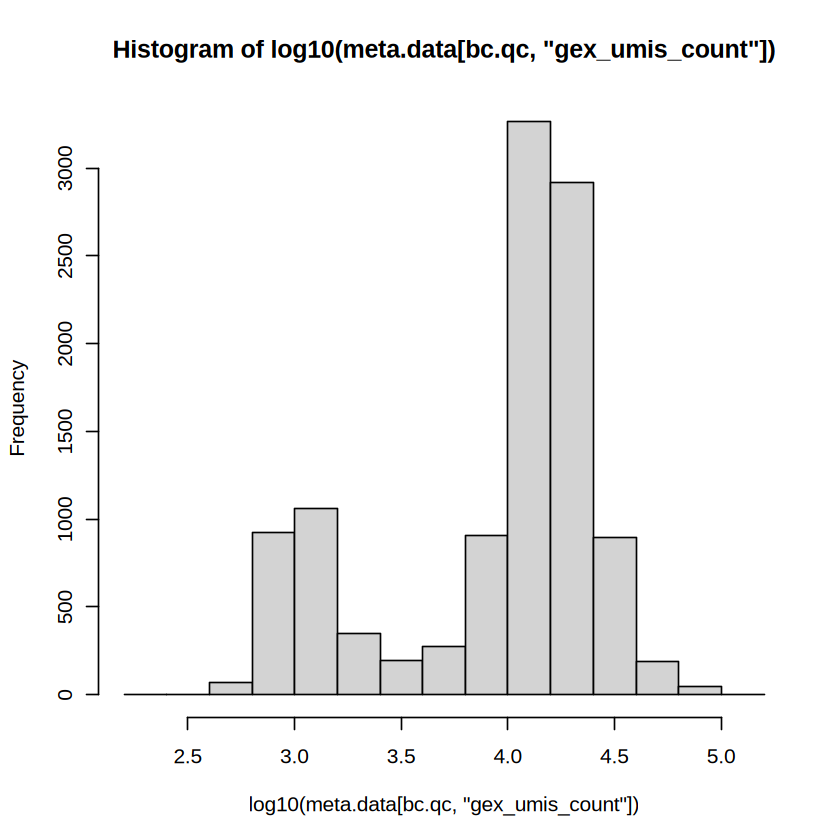

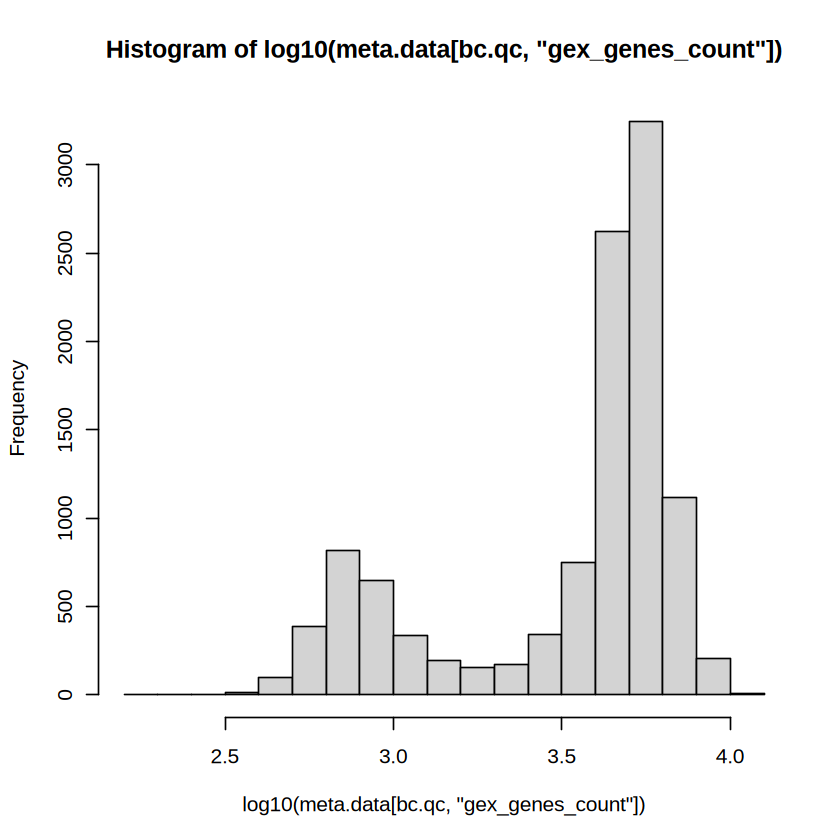

In [5]:
hist(log10(meta.data[bc.qc,"gex_umis_count"]))
hist(log10(meta.data[bc.qc,"gex_genes_count"]))

In [6]:
bc.qc.gex_filter = bc.qc[log10(meta.data[bc.qc,"gex_umis_count"]) > 3.8]

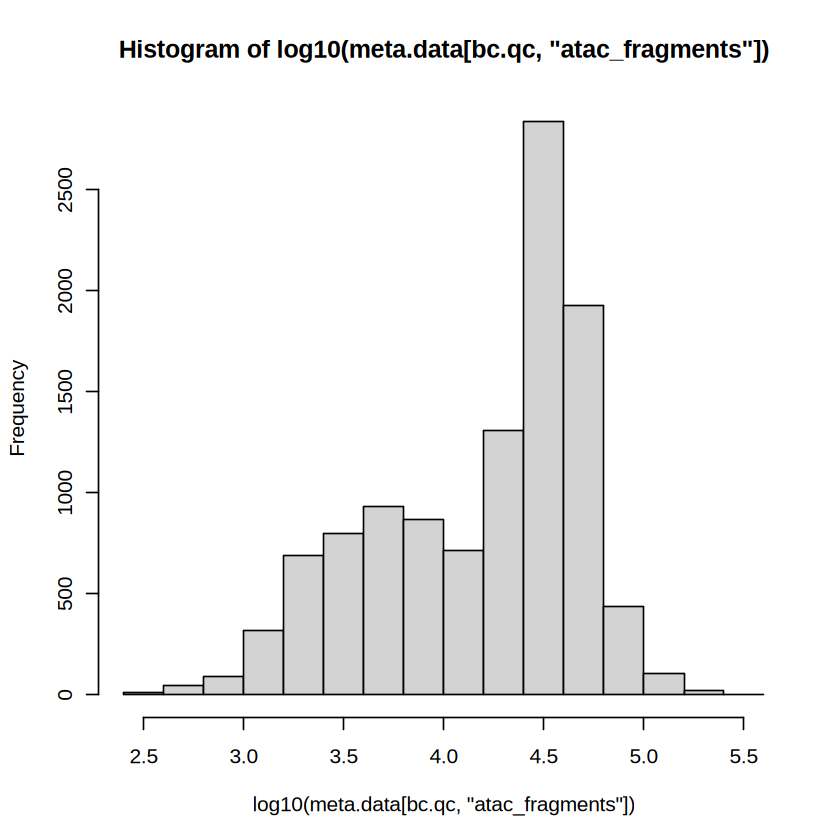

In [7]:
hist(log10(meta.data[bc.qc,"atac_fragments"]))

In [8]:
bc.qc.atac_filter = bc.qc[log10(meta.data[bc.qc,"atac_fragments"]) > 3]

In [9]:
bc.qc.gex_atac_filter = intersect(bc.qc.gex_filter,
                                  bc.qc.atac_filter)

In [10]:
meta.data.qc = meta.data[bc.qc.gex_atac_filter,]
meta.data.qc$sample = "K562_Xu"
meta.data.qc$sample_barcode = paste(meta.data.qc$sample,
                                    meta.data.qc$barcode,
                                    sep = "_")
rownames(meta.data.qc) = meta.data.qc$sample_barcode
meta.data.qc

,barcode,gex_barcode,atac_barcode,is_cell,excluded_reason,gex_raw_reads,gex_mapped_reads,gex_conf_intergenic_reads,gex_conf_exonic_reads,gex_conf_intronic_reads,⋯,atac_lowmapq,atac_dup_reads,atac_chimeric_reads,atac_mitochondrial_reads,atac_fragments,atac_TSS_fragments,atac_peak_region_fragments,atac_peak_region_cutsites,sample,sample_barcode
,<chr>,<chr>,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<chr>,<chr>
K562_Xu_AAACAGCCAAGCGATG-1,AAACAGCCAAGCGATG-1,AAACAGCCAAGCGATG-1,ACAGCGGGTCTATGAC-1,1,0,22780,21299,1031,12888,6630,⋯,1917,6586,12,729,18100,6228,7811,14256,K562_Xu,K562_Xu_AAACAGCCAAGCGATG-1
K562_Xu_AAACAGCCACATGCTA-1,AAACAGCCACATGCTA-1,AAACAGCCACATGCTA-1,ACAGCGGGTTTGACTA-1,1,0,35684,33381,1800,19089,11340,⋯,3623,13706,22,1365,37320,14839,17405,31603,K562_Xu,K562_Xu_AAACAGCCACATGCTA-1
K562_Xu_AAACAGCCACGGTACT-1,AAACAGCCACGGTACT-1,AAACAGCCACGGTACT-1,ACAGCGGGTGCAACGG-1,1,0,39056,36489,1740,19668,13828,⋯,3888,16053,23,739,45524,15733,19413,35152,K562_Xu,K562_Xu_AAACAGCCACGGTACT-1
K562_Xu_AAACAGCCATAAAGCA-1,AAACAGCCATAAAGCA-1,AAACAGCCATAAAGCA-1,ACAGCGGGTAATAAGC-1,1,0,19864,18388,239,16062,928,⋯,2598,5847,24,5587,15732,8873,8880,15977,K562_Xu,K562_Xu_AAACAGCCATAAAGCA-1
K562_Xu_AAACATGCAACTCGCG-1,AAACATGCAACTCGCG-1,AAACATGCAACTCGCG-1,CATTTAGGTGCGCAAG-1,1,0,22284,20879,1076,11781,7226,⋯,2663,9689,21,1560,29204,10479,11625,20847,K562_Xu,K562_Xu_AAACATGCAACTCGCG-1
K562_Xu_AAACATGCAATCCTAG-1,AAACATGCAATCCTAG-1,AAACATGCAATCCTAG-1,CATTTAGGTGTGCGGA-1,1,0,48031,45104,2177,21765,19525,⋯,1199,4540,9,397,13206,5023,6390,11654,K562_Xu,K562_Xu_AAACATGCAATCCTAG-1
K562_Xu_AAACATGCACATAACT-1,AAACATGCACATAACT-1,AAACATGCACATAACT-1,CATTTAGGTTTCCGGA-1,1,0,22196,20741,453,10533,9122,⋯,1437,4503,18,2637,12323,5900,6797,12399,K562_Xu,K562_Xu_AAACATGCACATAACT-1
K562_Xu_AAACATGCACCTATAG-1,AAACATGCACCTATAG-1,AAACATGCACCTATAG-1,CATTTAGGTAACGAGC-1,1,0,32701,30673,1032,16978,11262,⋯,2318,9117,10,1169,26593,8349,9718,17464,K562_Xu,K562_Xu_AAACATGCACCTATAG-1
K562_Xu_AAACATGCAGGGAGCT-1,AAACATGCAGGGAGCT-1,AAACATGCAGGGAGCT-1,CATTTAGGTGAGCATA-1,1,0,26200,24564,1772,14015,7935,⋯,3349,12297,30,1010,35168,11925,14013,25132,K562_Xu,K562_Xu_AAACATGCAGGGAGCT-1


Import RNA and RNA count matrix

In [11]:
matrix.tmp = Read10X(data.dir = "/maps/projects/ralab_nnfc-AUDIT/people/lpm537/project/E2G/processed/10x_multiome_230720/ArrayExpress/cellranger_res/EMTAB11264_01/outs/raw_feature_bc_matrix/")
matrix.tmp$`Gene Expression` = matrix.tmp$`Gene Expression`[,meta.data.qc$barcode]
matrix.tmp$Peaks = matrix.tmp$Peaks[,meta.data.qc$barcode]

colnames(matrix.tmp$`Gene Expression`) =
  meta.data.qc$sample_barcode
colnames(matrix.tmp$Peaks) =
  meta.data.qc$sample_barcode

10X data contains more than one type and is being returned as a list containing matrices of each type.



Create fragment object

In [12]:
list.fragments = list()
cells.tmp = meta.data.qc$barcode
names(cells.tmp) = meta.data.qc$sample_barcode
list.fragments[[1]] =
  CreateFragmentObject(path = "/maps/projects/ralab_nnfc-AUDIT/people/lpm537/project/E2G/processed/10x_multiome_230720/ArrayExpress/cellranger_res/EMTAB11264_01/outs/atac_fragments.tsv.gz",
                       cells = cells.tmp)

Computing hash



Import geneome annotation

In [13]:
annotation.gtf <- import("/maps/projects/ralab/data/genome/hg38/cellranger_arc/refdata-cellranger-arc-GRCh38-NNFC-2.0.2/genes/genes.gtf.gz", format = "gtf")
mcols(annotation.gtf) = mcols(annotation.gtf)[,c("transcript_id","gene_name","gene_id","gene_type","type")]
colnames(mcols(annotation.gtf)) = c("tx_id", "gene_name", "gene_id", "gene_biotype", "type")

Create seurat object

In [14]:
obj.seurat <- CreateSeuratObject(
  counts = matrix.tmp$`Gene Expression`,
  assay = "RNA",
  meta.data = meta.data.qc
)

Warning message:
“Feature names cannot have underscores ('_'), replacing with dashes ('-')”


In [15]:
obj.seurat[["Peaks"]] <- CreateChromatinAssay(
  counts = matrix.tmp$Peaks,
  fragments = list.fragments,
  annotation = annotation.gtf,
  sep = c(":", "-")
)

Warning message:
“Feature names cannot have underscores ('_'), replacing with dashes ('-')”
Warning message:
“Feature names cannot have underscores ('_'), replacing with dashes ('-')”


In [16]:
obj.seurat

An object of class Seurat 
186939 features across 8092 samples within 2 assays 
Active assay: RNA (62757 features, 0 variable features)
 1 layer present: counts
 1 other assay present: Peaks

Check ATAC quality

In [17]:
DefaultAssay(obj.seurat) <- "Peaks"
obj.seurat <- NucleosomeSignal(obj.seurat)
obj.seurat <- TSSEnrichment(obj.seurat)

Extracting TSS positions

Extracting fragments at TSSs


Computing TSS enrichment score



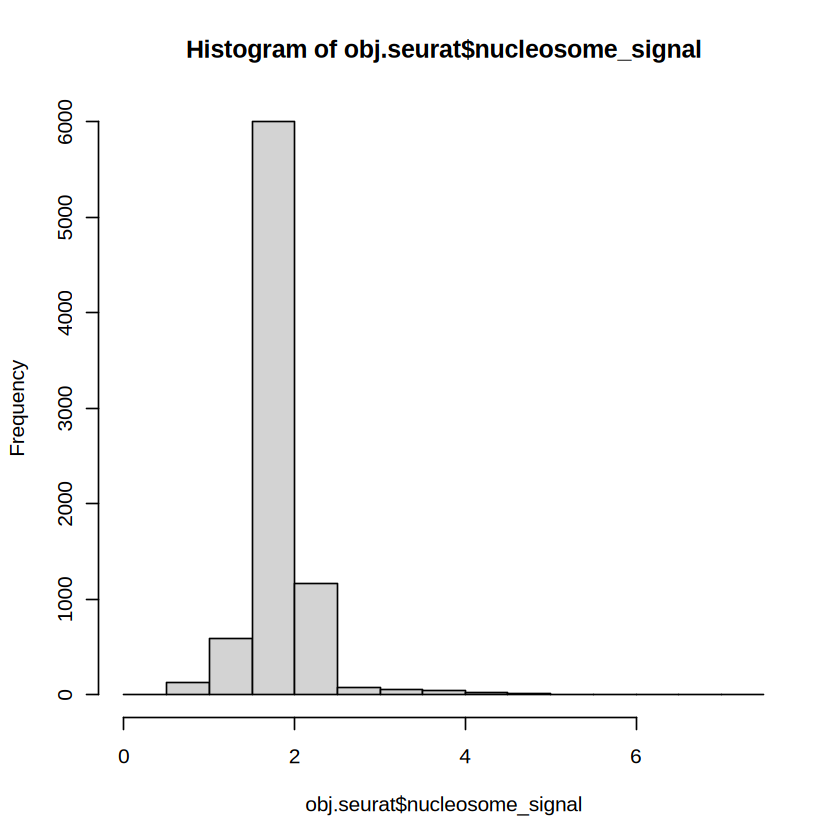

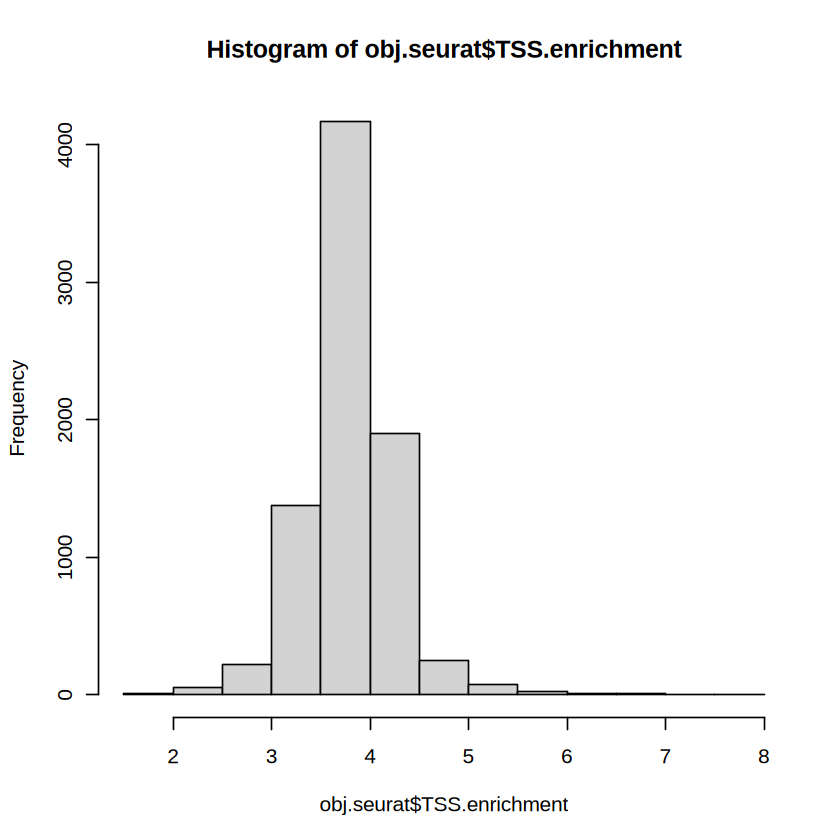

In [18]:
hist(obj.seurat$nucleosome_signal)
hist(obj.seurat$TSS.enrichment)

Filter out low ATAC quality cells

In [19]:
obj.seurat.qc = 
  subset(obj.seurat,
         subset = nucleosome_signal < 2.5 & 
           TSS.enrichment > 2.5)
obj.seurat.qc

An object of class Seurat 
186939 features across 7821 samples within 2 assays 
Active assay: Peaks (124182 features, 0 variable features)
 2 layers present: counts, data
 1 other assay present: RNA

Plot RNA UMAP

In [20]:
DefaultAssay(obj.seurat.qc) <- "RNA"
obj.seurat.qc <- obj.seurat.qc %>%
  NormalizeData() %>%
  FindVariableFeatures() %>%
  ScaleData() %>%
  RunPCA() %>%
  RunUMAP(dims = 1:30) %>%
  FindNeighbors(dims = 1:30) %>%
  FindClusters()

Normalizing layer: counts

Finding variable features for layer counts

Centering and scaling data matrix

PC_ 1 
Positive:  KLF6, VIM, UBE2H, AAK1, PPP1R15A, SQSTM1, TXNIP, TPM4, CLIC1, DUSP8 
	   NEU1, DDIT3, SPTAN1, SLC41A2, CREBRF, JUN, KRT19, CYP3A5, SAT2, KLF10 
	   ARRDC4, BTG2, UPP1, AHNAK, BTG1, GDF15, PKM, CPEB4, EPAS1, LGALS1 
Negative:  CCDC26, LINC01029, LINC01033, ENSG00000260126, KCNQ5, ENSG00000227706, PCDH9, TFRC, ENSG00000266976, ENSG00000189229 
	   HTR1F, ENSG00000286385, RELN, IMMP2L, ARHGAP24, MTHFD1L, HBA1, SLC25A21, ADAMTS3, B3GALT1-AS1 
	   SPATA5, CR1L, HBA2, VWDE, DDX10, HEMGN, HBZ, MT-ND1, C17orf99, AIG1 
PC_ 2 
Positive:  STXBP5, NIHCOLE, LINC02109, CRPPA, LINC00534, BMP2K, ARL15, ENSG00000286251, LINC03000, RABGAP1L 
	   SCN9A, CDC42BPA, ADGRB3, NLK, MIR3681HG, ANTXR2, ENSG00000250453, UTRN, LINC02476, ENSG00000254180 
	   SSBP2, ANK3, IMMP2L, C1QTNF3-AMACR, ENSG00000263551, CD84, DOCK2, LINC02240, PRKCB, MAML2 
Negative:  FTH1, HBA1, KLF10, UBE2S, HBA2, DD

Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 7821
Number of edges: 276605

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7829
Number of communities: 10
Elapsed time: 0 seconds


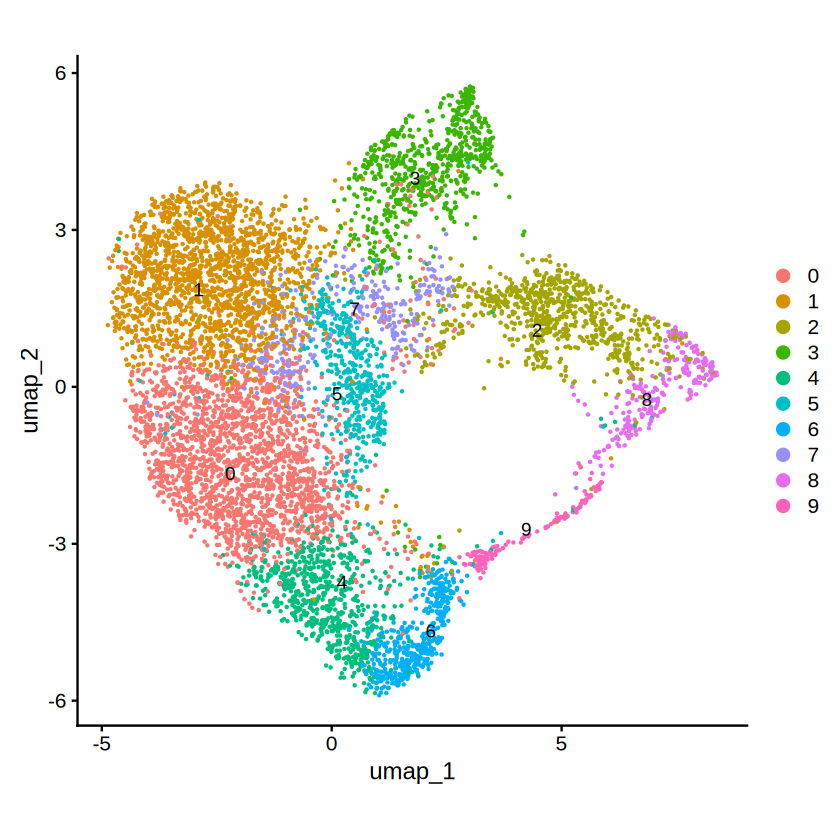

In [21]:
DimPlot(obj.seurat.qc, label = TRUE, repel = TRUE, reduction = "umap")  +
  theme(aspect.ratio=1)

Plot ATAC UMAP

In [22]:
DefaultAssay(obj.seurat.qc) <- "Peaks"
obj.seurat.qc <- obj.seurat.qc %>%
  RunTFIDF() %>%
  FindTopFeatures(min.cutoff = 'q0') %>%
  RunSVD() %>%
  RunUMAP(reduction = 'lsi', dims = 2:30) %>%
  FindNeighbors(reduction = 'lsi', dims = 2:30) %>%
  FindClusters(verbose = FALSE, algorithm = 3)

Performing TF-IDF normalization

Running SVD

Scaling cell embeddings

13:00:49 UMAP embedding parameters a = 0.9922 b = 1.112

Found more than one class "dist" in cache; using the first, from namespace 'spam'

Also defined by ‘BiocGenerics’

13:00:49 Read 7821 rows and found 29 numeric columns

13:00:49 Using Annoy for neighbor search, n_neighbors = 30

Found more than one class "dist" in cache; using the first, from namespace 'spam'

Also defined by ‘BiocGenerics’

13:00:49 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

13:00:50 Writing NN index file to temp file /tmp/RtmpdqFPsx/file256ecb1d317de4

13:00:50 Searching Annoy index using 1 thread, search_k = 3000

13:00:52 Annoy recall = 100%

13:00:53 Commencing smooth kNN distance calibration using 1 thread
 with tar

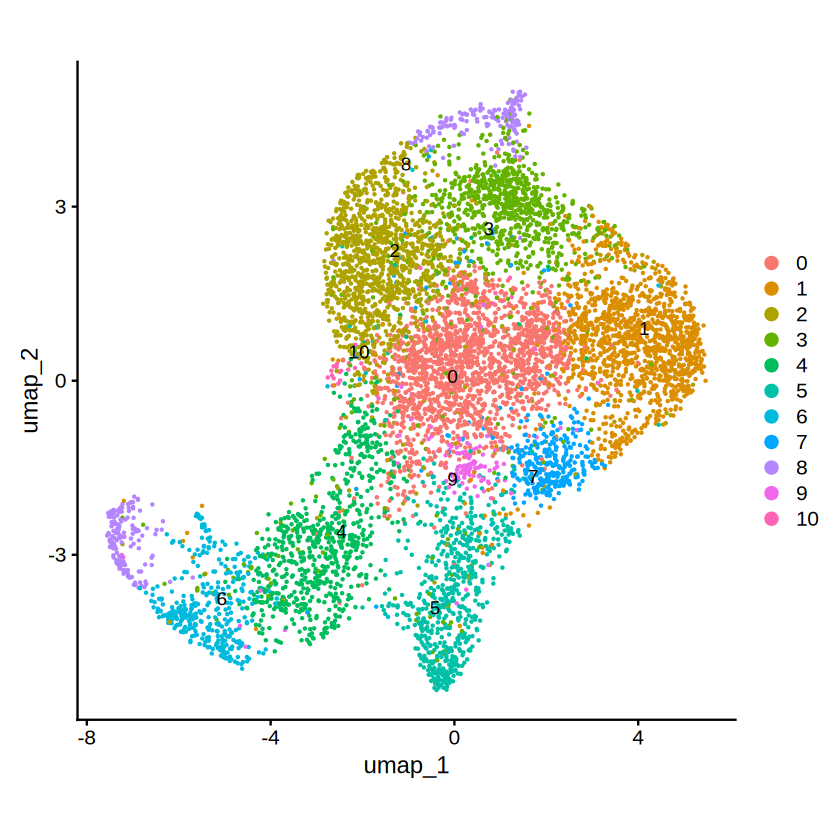

In [23]:
DimPlot(obj.seurat.qc, label = TRUE, repel = TRUE, reduction = "umap")  +
  theme(aspect.ratio=1)

Output fragment file for cells passing qc

In [24]:
atac_fragments = read.delim("/maps/projects/ralab_nnfc-AUDIT/people/lpm537/project/E2G/processed/10x_multiome_230720/ArrayExpress/cellranger_res/EMTAB11264_01/outs/atac_fragments.tsv.gz",
                            header = F,
                            comment.char = "#")

In [25]:
atac_fragments.filter = 
  atac_fragments[atac_fragments$V4 %in% obj.seurat.qc$barcode,]
atac_fragments.filter = 
  atac_fragments.filter[atac_fragments.filter$V1 %in% paste("chr",c(1:22,"X","Y"), sep = ""),]
atac_fragments.filter[,4] = paste("K562_Xu",atac_fragments.filter[,4],sep = "_")
atac_fragments.filter

,V1,V2,V3,V4,V5
,<chr>,<int>,<int>,<chr>,<int>
1,chr1,9985,10132,K562_Xu_CGTAGCGGTTTATTCG-1,1
2,chr1,9987,10114,K562_Xu_TCATAACCATTGTCCT-1,1
3,chr1,9987,10125,K562_Xu_GACCGTTCAATTAACC-1,1
4,chr1,9989,10103,K562_Xu_GACCTTTGTTAGCGTA-1,1
5,chr1,9989,10124,K562_Xu_TCCATTGTCCTTGCAC-1,1
6,chr1,9989,10136,K562_Xu_GGACATAAGCAGCTCA-1,1
7,chr1,9989,10137,K562_Xu_ATGTCATCAGTCTAGC-1,1
8,chr1,9989,10138,K562_Xu_GTCATGCCAGGATGGC-1,1
9,chr1,9990,10157,K562_Xu_AGCCGCTAGGATCCGC-1,1


In [27]:
write.table(atac_fragments.filter,
            "../../../data/K562_Xu/1.prepare_data/1.seurat_pipeline.240507/atac_fragments.tsv",
            col.names = F,
            row.names = F,
            quote = F,
            sep = "\t")
bgzip("../../../data/K562_Xu/1.prepare_data/1.seurat_pipeline.240507/atac_fragments.tsv",
      "../../../data/K562_Xu/1.prepare_data/1.seurat_pipeline.240507/atac_fragments.tsv.gz",
     overwrite = T)


indexTabix("../../../data/K562_Xu/1.prepare_data/1.seurat_pipeline.240507/atac_fragments.tsv.gz",
           format = "bed")

system("../../../data/K562_Xu/1.prepare_data/1.seurat_pipeline.240507/atac_fragments.tsv")

[1] "../../../data/K562_Xu/1.prepare_data/1.seurat_pipeline.240507/atac_fragments.tsv.gz"

[1] "../../../data/K562_Xu/1.prepare_data/1.seurat_pipeline.240507/atac_fragments.tsv.gz.tbi"

Output RNA count matrix file for cells passing qc

In [28]:
write.csv(as.data.frame(obj.seurat.qc@assays$RNA$count),
          "../../../data/K562_Xu/1.prepare_data/1.seurat_pipeline.240507/rna_count_matrix.csv.gz",
          quote = F)

Warning message in asMethod(object):
“sparse->dense coercion: allocating vector of size 3.7 GiB”


Save obj.seurat.qc

In [29]:
saveRDS(obj.seurat.qc,
         "../../../data/K562_Xu/1.prepare_data/1.seurat_pipeline.240507/obj.seurat.qc.rds")

In [30]:
sessionInfo()

R version 4.3.3 (2024-02-29)
Platform: x86_64-conda-linux-gnu (64-bit)
Running under: Red Hat Enterprise Linux 8.9 (Ootpa)

Matrix products: default
BLAS/LAPACK: /maps/projects/ralab/people/lpm537/software/anaconda3/envs/Notebook_E2G_240505/lib/libopenblasp-r0.3.27.so;  LAPACK version 3.12.0

locale:
 [1] LC_CTYPE=en_US.UTF-8       LC_NUMERIC=C              
 [3] LC_TIME=en_US.UTF-8        LC_COLLATE=en_US.UTF-8    
 [5] LC_MONETARY=en_US.UTF-8    LC_MESSAGES=en_US.UTF-8   
 [7] LC_PAPER=en_US.UTF-8       LC_NAME=C                 
 [9] LC_ADDRESS=C               LC_TELEPHONE=C            
[11] LC_MEASUREMENT=en_US.UTF-8 LC_IDENTIFICATION=C       

time zone: Europe/Copenhagen
tzcode source: system (glibc)

attached base packages:
[1] stats4    grid      stats     graphics  grDevices utils     datasets 
[8] methods   base     

other attached packages:
 [1] Rsamtools_2.18.0     Biostrings_2.70.1    XVector_0.42.0      
 [4] GenomicRanges_1.54.1 GenomeInfoDb_1.38.1  IRanges_2.36.0      

In [1]:
obj.seurat.qc = readRDS("../../../data/K562_Xu/1.prepare_data/1.seurat_pipeline.240507/obj.seurat.qc.rds")

In [3]:
write.csv(t(as.data.frame(obj.seurat.qc@assays$RNA$count)),
          gzfile("../../../data/K562_Xu/1.prepare_data/1.seurat_pipeline.240507/rna_count_matrix.t.csv.gz"),
          quote = F)

Warning message in asMethod(object):
“sparse->dense coercion: allocating vector of size 3.7 GiB”


In [4]:
write.csv(obj.seurat.qc@meta.data,
          "../../../data/K562_Xu/1.prepare_data/1.seurat_pipeline.240507/meta.data.csv",
          quote = F)